In [1]:
from sklearn.decomposition import FastICA
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import ibc_public
import os

/home/sshankar/env/fastsrm/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
# Some input folder and file info
task = 'raiders'
datadir = os.path.join('..', task, '3mm')

In [11]:
# Specify data file and load it into memory
datafile = 'shared_resp.npy'
data = np.load(os.path.join(datadir, datafile))

In [12]:
# Set up some parameters for the ICA
n_components = 20
random_state = 0
tol = 0.005
max_iter = 5000

In [13]:
# Initialize the ICA model
fast_ica = FastICA(n_components=n_components,
                  random_state=random_state,
                  tol=tol,
                  max_iter=max_iter)

In [14]:
# Transform input data using the ICA model
data_transform = fast_ica.fit_transform(data.T).T

In [15]:
np.save(os.path.join(datadir, 'fastica_components.npy'), data_transform)

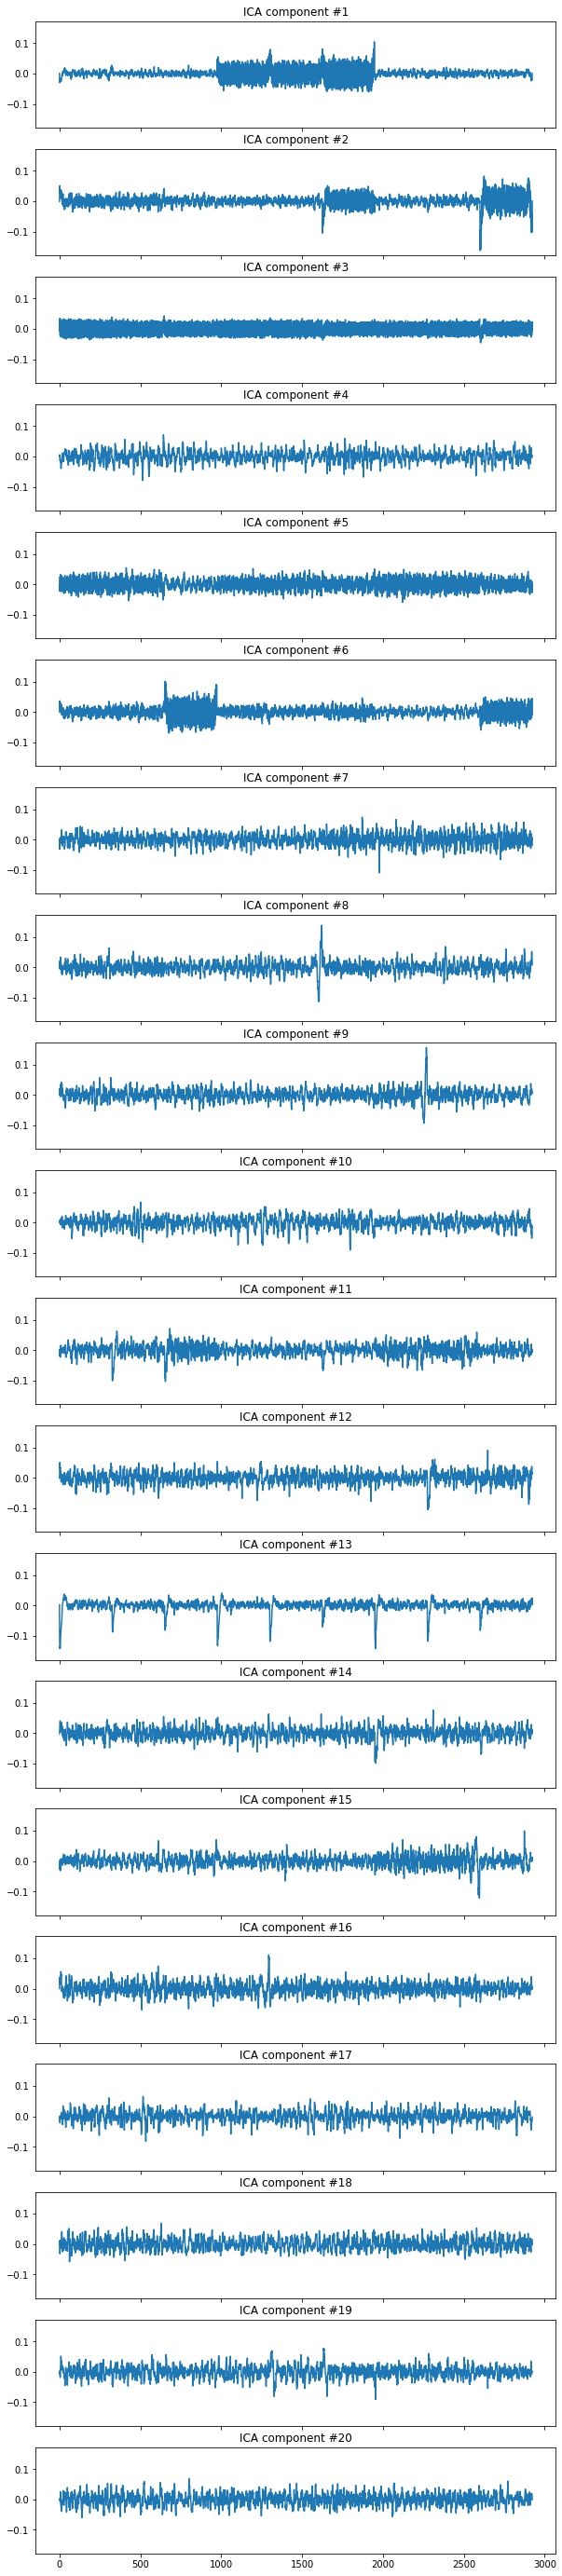

In [14]:
# These are what the ICA components look like
fig, axs = plt.subplots(n_components, sharex=True, sharey=True, 
                        figsize=(10,50))
for i in range(n_components):
    axs[i].plot(data_transform[:,i])
    axs[i].set_title('ICA component #' + str(i+1))

In [15]:
# Save the ICA components as images
fig.savefig(os.path.join(datadir, 
                         task + '-temporal_ICA_' + str(n_components) + 'comp.pdf'), 
            format='pdf', transparent=False)

In [17]:
data_inv = fast_ica.inverse_transform(data_transform)

In [18]:
data_inv.shape

(2925, 20)

In [19]:
data_transform.shape

(2925, 20)